##Plot gas fractions from a compilation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#cosmology assumed for plotting purposes 

hubble = 0.6766 # Planck18 hubble constant 
f_uni =  0.04897/(0.04897+0.26067) #Planck18 universal baryon fraction, with respect to the cold matter (no massive neutrinos included) 


## Loading the datasets



WARNING: Cosmology dependence of the measurements to be taken into account

In [3]:
data_dir = "data/"

In [4]:
# Popesso 2024 bestfit relations, eROSITA + CHEXMATE, https://arxiv.org/pdf/2411.16555
h0_popesso = 0.6774
M200_ih = np.logspace(12.5,15)
M200 = M200_ih / h0_popesso * (h0_popesso/hubble)
fgas_200 = (2.09) * 1e-6 * (M200)**(0.33) * h0_popesso**(3/2)/(hubble**(3./2))
fgas_200_plus = (2.09+0.14) * 1e-6 * (M200)**(0.33 + 0.02) * h0_popesso**(3/2)/(hubble**(3./2))
fgas_200_minus = (2.09-0.14) * 1e-6 * (M200)**(0.33 - 0.02) * h0_popesso**(3/2)/(hubble**(3./2))

M500_ih = np.logspace(12.5,15)
M500 = M500_ih/h0_popesso * (h0_popesso/hubble)
fgas_500 = (2.23) * 1e-7 * (M500)**(0.39) * h0_popesso**(3/2)/(hubble**(3./2))
fgas_500_plus = (2.23+0.18) * 1e-7 * (M500)**(0.39 + 0.02) * h0_popesso**(3/2)/(hubble**(3./2))
fgas_500_minus = (2.23-0.18) * 1e-7 * (M500)**(0.39 - 0.02) * h0_popesso**(3/2)/(hubble**(3./2))

In [5]:
##### Bulbul et al. 2024 
data = np.loadtxt(data_dir+"Bulbul_2024.dat",skiprows=2)
h0_bulbul = 0.6715 #Hubble factor assumed in the paper
m500_B = data[:,0]*1e13*h0_bulbul 
m500_Bm = data[:,1]*1e13*h0_bulbul 
m500_Bp = data[:,2]*1e13*h0_bulbul 
f_gas_B = data[:,3] * h0_bulbul**(3/2)/(hubble**(3/2))
f_gas_Bm = data[:,4] * h0_bulbul**(3/2)/(hubble**(3/2))
f_gas_Bp = data[:,5] * h0_bulbul**(3/2)/(hubble**(3/2))

mask = f_gas_B >= 0

m500_B = m500_B[mask]
m500_Bm = m500_Bm[mask]
m500_Bp = m500_Bp[mask]
f_gas_B = f_gas_B[mask]
f_gas_Bm = f_gas_Bm[mask]
f_gas_Bp = f_gas_Bp[mask]


In [6]:
##### Gonzalez (https://arxiv.org/pdf/1309.3565.pdf)
data = np.loadtxt(data_dir+"Gonzalez_2013.dat",skiprows=1)
h0_gonzalez = 0.6715 #Hubble factor assumed in the paper
f_gas = data[:,1] * h0_gonzalez**(3/2)/(hubble**(3/2))
erf_gas = data[:,2] * h0_gonzalez**(3/2)/(hubble**(3/2))
f_star = data[:,3]
erf_star = data[:,4]
m500 = data[:,7]*1e14*h0_gonzalez 
erm500 = data[:,8]*1e14*h0_gonzalez
r500 = data[:,9]*h0_gonzalez
err500 = data[:,10]*h0_gonzalez

In [7]:
####### Vikhlinin (https://iopscience.iop.org/article/10.1086/500288/pdf)#WARNING: arXiv version (https://arxiv.org/pdf/astro-ph/0507092.pdf) is different!
data = np.loadtxt(data_dir+"Vikhlinin_2006.dat",skiprows=2)
h0_vik = 0.72 #Hubble factor assumed in the paper
f_gas_V = data[:,14] * h0_vik**(3/2)/(hubble**(3/2))
erf_gas_V = data[:,15] * h0_vik**(3/2)/(hubble**(3/2))
m500_V = data[:,10]*1e14 * h0_vik 
erm500_V = data[:,11]*1e14 * h0_vik
r500_V = data[:,0] * h0_vik
err500_V = data[:,1] * h0_vik

In [8]:
####### Giodini 2009 (https://arxiv.org/pdf/0904.0448.pdf)
data = np.loadtxt(data_dir+"Giodini_2009.dat",skiprows=2)
h0_gio = 0.72 #Hubble factor assumed in the paper ‹WANING: CHECK THIS
f_star_G = data[:,1]
erf_star_G = data[:,2]
m500_G = data[:,0] * h0_gio
f_gas_G = data[:,3] * h0_gio**(3/2)/(hubble**(3/2))
erf_gas_G = data[:,4] * h0_gio**(3/2)/(hubble**(3/2))
f_stargas_G = data[:,5]
erf_stargas_G = data[:,6]

In [9]:
####### Arnaud 2017 (https://www.aanda.org/articles/aa/pdf/2007/42/aa8541-07.pdf)
data = np.loadtxt(data_dir+"Arnaud_2007.dat",skiprows=2)
h0_arnaud = 0.7
m500_A = data[:,4] *h0_arnaud*1e14
m500_Ap = data[:,5] *h0_arnaud*1e14
m500_Am = -data[:,6] *h0_arnaud*1e14
f_gas_A = data[:,13] * h0_arnaud**(3/2)/(hubble**(3/2))
f_gas_Ap = data[:,14] * h0_arnaud**(3/2)/(hubble**(3/2))
f_gas_Am = -data[:,15] * h0_arnaud**(3/2)/(hubble**(3/2))

In [10]:
####### Sun 2008 (https://arxiv.org/pdf/0805.2320.pdf)
data = np.loadtxt(data_dir+"Sun_2008.dat",skiprows=2)
h0_sun = 0.73
m500_S = data[:,1]*h0_sun*1e13
m500_Sp = data[:,2]*h0_sun*1e13
m500_Sm = -data[:,3]*h0_sun*1e13
f_gas_S = data[:,4]* h0_sun**(3/2)/(hubble**(3/2))
f_gas_Sp = data[:,5]* h0_sun**(3/2)/(hubble**(3/2))
f_gas_Sm = -data[:,6]* h0_sun**(3/2)/(hubble**(3/2))

In [11]:
########Ettori et al. 2011  https://arxiv.org/pdf/1009.3266
h0_ettori = 0.7
data = np.loadtxt(data_dir+"Ettori_2011_masses_method2.dat",skiprows=2) #M_200c
m200_ettori = data[:,6] * h0_ettori*1e14 
m200_ettori_p = data[:,7]*  h0_ettori*1e14
m200_ettori_m = -data[:,8]* h0_ettori*1e14
c200_ettori = data[:,3]

data = np.loadtxt(data_dir+"Ettori_2011.dat",skiprows=2) #f_500, method 2 
f_gas_ettori = data[:,-2] * h0_ettori**(3/2)/(hubble**(3/2)) 
f_gas_err_ettori = data[:,-1]* h0_ettori**(3/2)/(hubble**(3/2))

In [25]:
####### Reyes 2012 (https://arxiv.org/pdf/1110.4107)
data = np.loadtxt(data_dir+"Reyes_2012.dat",skiprows=2)
h0_r = 0.7 #Hubble factor assumed in the paper 
M_star_R = 10**data[:,0]
erf_M_star_R = 10**data[:,2]

f_star_200_R = 10**-data[:,3]
erf_star_200_R = 10**-data[:,4]

M_200c_R = 1/f_star_200_R*M_star_R * h0_r
erf_M200c_R = 1/erf_star_200_R*erf_M_star_R * h0_r

In [12]:
####### Kravtsov 2018 (https://arxiv.org/pdf/1401.7329)
data = np.loadtxt(data_dir+"Kravtsov_2018.dat",skiprows=2)

h0_K = 0.7 #Hubble factor assumed in the paper 

M_500_K = data[:,3]*1e14*h0_K

M_bcg_K = data[:,7]*1e12*h0_K
err_M_bcg_K = data[:,8]*1e12*h0_K
M_non_bcg_K = data[:,9]*1e12*h0_K
err_M_non_bcg_K = data[:,10]*1e12*h0_K

frac_star_K = (M_bcg_K+M_non_bcg_K)/M_500_K
err_frac_star_K = np.sqrt((err_M_bcg_K/M_500_K)**2+(err_M_non_bcg_K/M_500_K)**2)

In [14]:
#Chiu et al. 2018 (https://academic.oup.com/mnras/article/478/3/3072/4996803)
h0_chiu = 0.68
data = np.genfromtxt(data_dir+"Chiu_2018.dat", dtype=None, names=True,encoding='utf-8', skip_header=17)#

M500_Chiu  = data['M500'] * 1e14 * h0_chiu
Mgas_Chiu  = data['MICM'] * 1e13 * h0_chiu
Mstar_Chiu  = data['Mstar'] * 1e12 * h0_chiu

err_M500_Chiu = data['M500_err'] * 1e14 * h0_chiu
err_Mgas_Chiu = data['MICM_err'] * 1e13 * h0_chiu
err_Mstar_Chiu = data['Mstar_err'] * 1e12 * h0_chiu

f_gas_Chiu = Mgas_Chiu/M500_Chiu
f_star_Chiu = Mstar_Chiu/M500_Chiu

err_f_gas_Chiu = np.sqrt((err_Mgas_Chiu/Mgas_Chiu)**2+(err_M500_Chiu/M500_Chiu)**2)*f_gas_Chiu
err_f_star_Chiu = np.sqrt((err_Mstar_Chiu/Mstar_Chiu)**2+(err_M500_Chiu/M500_Chiu)**2)*f_star_Chiu

In [15]:
########Wicker et al 2022,  https://arxiv.org/pdf/2204.12823.pdf
h0_wicker = 0.7
data = np.loadtxt(data_dir+"Wicker_2022.dat",skiprows=2)#
m500_wicker = data[:,4] * h0_wicker*1e14
m500_wicker_p = data[:,5]*  h0_wicker*1e14
m500_wicker_m = data[:,6]* h0_wicker*1e14

f_gas_wicker = data[:,7]* h0_wicker**(3/2)/(hubble**(3/2))
f_gas_wicker_p = data[:,8]* h0_wicker**(3/2)/(hubble**(3/2))
f_gas_wicker_m = data[:,9]* h0_wicker**(3/2)/(hubble**(3/2))

In [16]:
###### Akino regression  (Akino et al. 2022 https://arxiv.org/pdf/2111.10080, Appendix E)

hubble_Akino = 0.7
def Akino_regression(m500, alpha, beta):
    m = alpha + beta*np.log(m500/1e14) 
    M = np.exp(m)*1e12
    return M

M500_Akino = np.logspace(13, 15, 20)

M_bcg_A = Akino_regression(M500_Akino, -1.07, 0.39)
M_bcg_m = Akino_regression(M500_Akino, -1.07-0.08, 0.39-0.08)
M_bcg_p = Akino_regression(M500_Akino, -1.07+0.18, 0.39+0.13)

M_star_A = Akino_regression(M500_Akino, 0.68, 0.76)
M_star_m1 = Akino_regression(M500_Akino, 0.68-0.07, 0.76+0.12)
M_star_p1 = Akino_regression(M500_Akino, 0.68+0.15, 0.76-0.15)
M_star_m2 = Akino_regression(M500_Akino, 0.68-0.07, 0.76-0.12)
M_star_p2 = Akino_regression(M500_Akino, 0.68+0.15, 0.76+0.15)

f_star_Akino = M_star_A/M500_Akino
f_star_Akino_m1 = M_star_m1/M500_Akino
f_star_Akino_p1 = M_star_p1/M500_Akino
f_star_Akino_m2 = M_star_m2/M500_Akino
f_star_Akino_p2 = M_star_p2/M500_Akino

f_star_Akino_m = np.min([f_star_Akino_m1,f_star_Akino_m2],axis=0)
f_star_Akino_p = np.max([f_star_Akino_p1,f_star_Akino_p2],axis=0)

M_gas_A = Akino_regression(M500_Akino, 2.02, 1.28)
M_gas_m1 = Akino_regression(M500_Akino, 2.02-0.10, 1.28-0.09)
M_gas_p1 = Akino_regression(M500_Akino, 2.02+0.08, 1.28+0.12)
M_gas_m2 = Akino_regression(M500_Akino, 2.02-0.10, 1.28+0.09)
M_gas_p2 = Akino_regression(M500_Akino, 2.02+0.08, 1.28-0.12)

f_gas_Akino = M_gas_A/M500_Akino
f_gas_Akino_m1 = M_gas_m1/M500_Akino
f_gas_Akino_p1 = M_gas_p1/M500_Akino
f_gas_Akino_m2 = M_gas_m2/M500_Akino
f_gas_Akino_p2 = M_gas_p2/M500_Akino
f_gas_Akino_m = np.min([f_gas_Akino_m1,f_gas_Akino_m2],axis=0)
f_gas_Akino_p = np.max([f_gas_Akino_p1,f_gas_Akino_p2],axis=0)

M500_Akino_ih = M500_Akino * hubble_Akino

In [17]:
### Grandis et al. 2024 (https://arxiv.org/pdf/2309.02920)

data = np.genfromtxt(data_dir+"Grandis_2024.dat", comments="#",dtype=None, encoding=None)
h_Grandis = 0.67
# Columns: survey, component, Mpiv, fraction, frac_err, slope, slope_err
survey = data['f0']
component = data['f1']
M500_Grandis= data['f2'] * h_Grandis
fractions = data['f3']
err_frac = data['f4']

# Gas (ICM)
gas_mask = component == "ICM"
M_500c_gGrandis = M500_Grandis[gas_mask]
f_gas_Grandis = fractions[gas_mask]
err_f_gas_Grandis = err_frac[gas_mask]

# Stellar
stellar_mask = component == "stars"
M_500c_sGrandis = M500_Grandis[stellar_mask]
f_star_Grandis = fractions[stellar_mask]
err_f_star_Grandis = err_frac[stellar_mask]


## Conversion from M500c to M200c and back for plotting purposes

In [19]:
def virial_mass_converter(delta1, mass1, conc1, delta2, conc2):
    """
    functions to compute halo mass considering an overdensity delta1 
    starting from a different overdensity delta2 and assuming a NFW halo profile
    e.g. how to go from Delta_200 to Delta_500
    see e.g. Ettori et al 2011
    """
    mass2 = delta2*conc2**3/(delta1*conc1**3)*mass1
    return mass2


def virial_concentration_converter(delta1, conc1, delta2):
    """
    functions to compute halo concentration
    changing value of overdensity and assuming a NFW halo profile
    e.g. how to go from Delta_200 to Delta_500
    see e.g. Ettori et al 2011
    """
    from scipy import optimize

    def function(conc2):
        return (conc1/conc2)**3 * (np.log(1+conc2)-conc2/(1+conc2)) / (
            np.log(1+conc1)-conc1/(1+conc1)) - delta2/delta1
    conc2 = optimize.fsolve(function, conc1)
    return conc2

In [20]:

c500_ettori = virial_concentration_converter(200,c200_ettori,500)
m500_ettori   = virial_mass_converter(200,m200_ettori,c200_ettori,500,c500_ettori)
m500_ettori_p =  virial_mass_converter(200,m200_ettori+m200_ettori_p,c200_ettori,500,c500_ettori) - m500_ettori
m500_ettori_m = m500_ettori-virial_mass_converter(200,m200_ettori-m200_ettori_m,c200_ettori,500,c500_ettori)


In [21]:
#tab for interpolating concentrations 
M200_tab = np.logspace(10,16,10) # M200c [Msun/h]
conc200_tab = np.array([11.6233726 , 10.40929352,  9.22054417,  8.06299494,  6.94876233,
                    5.89763865,  4.93478668,  4.0872995 ,  3.38574333,  2.85022947])
conc500_tab = virial_concentration_converter(200, conc200_tab, 500)
M500_tab = virial_mass_converter(200, M200_tab, conc200_tab, 500, conc500_tab)

def M500_to_M200(x):
    #return x/1e10
    return np.exp(np.interp(np.log(x), np.log(M500_tab), np.log(M200_tab)))
    
def M200_to_M500(x):
    #return x*1e10
    return np.exp(np.interp(np.log(x), np.log(M200_tab), np.log(M500_tab)))

## Conversion of stellar fractions from M500c to M200c and back for plotting purposes

In [22]:
def convert_fstar(M500, f500):
    """
    M500 = total halo mass, M500c in Msun/h
    Roughly convert stellar fraction from r500c to r200c assuming:
    - BCG fully enclosed within r500c, M_bcg(<r500c) = M_bcg(<r200c)
    - Satellites follow NFW, fraction f_sat(<r500c) = f_sat(<r200c)
    - scaling of the fraction M_BCG/M_star (Akino et al. 2022 https://arxiv.org/pdf/2111.10080)

    f_bcg_fraction = fraction of stellar mass in BCG
    """
    M500=np.atleast_1d(M500)
    f500=np.atleast_1d(f500)
    f_bcg = 0.196*hubble**0.34*(M500/1e14)**-0.34 #rough fraction M_BCG/M_star (Akino et al. 2022 https://arxiv.org/pdf/2111.10080) 
    f_bcg[f_bcg>1] = 1 #extrapolation to small halo scales
    #warning: redshift dependence to be taken into account

    f_sat = 1 - f_bcg

    M200 = M500_to_M200(M500)
    M_bcg = f_bcg * f500 * M500
    M_sat_200 = f_sat * f500 * M200

    f_star_200 = (M_bcg + M_sat_200) / M200

    return f_star_200

pivot_mass = 1e14 # M500c [Msun/h] 
f500_tab = np.linspace(1e-4, 0.5, 1000)
f200_tab = convert_fstar(pivot_mass, f500_tab)

def f500_to_f200(f500):
    return np.exp(np.interp(np.log(f500), np.log(f500_tab), np.log(f200_tab)))

def f200_to_f500(f200):
    return np.exp(np.interp(np.log(f200), np.log(f200_tab), np.log(f500_tab)))

## PLOTS 

/var/folders/9b/84b61wf119l496lr2pmsqdph0000gn/T/ipykernel_35967/317298262.py:35: UserWarning: Attempting to set identical left == right == 10000000000.0 results in singular transformations; automatically expanding.
  secax_top = ax.secondary_xaxis('top', functions=(M500_to_M200,M200_to_M500))
/var/folders/9b/84b61wf119l496lr2pmsqdph0000gn/T/ipykernel_35967/1663328842.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.interp(np.log(x), np.log(M200_tab), np.log(M500_tab)))


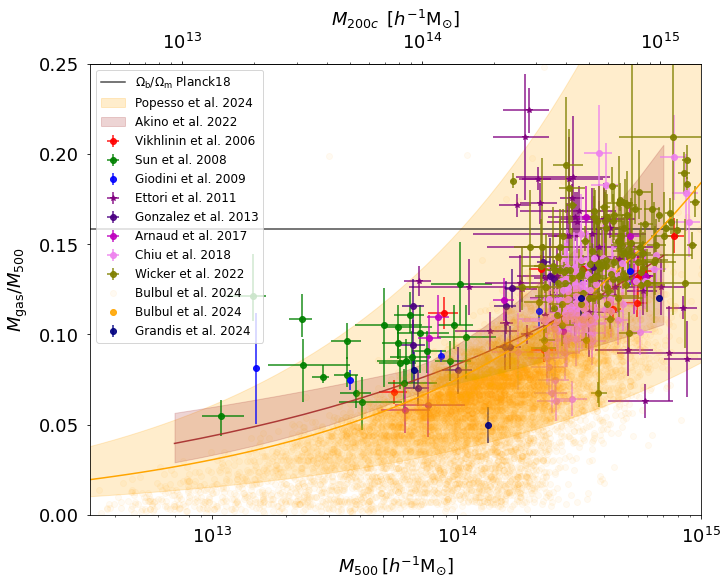

In [ ]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,8), constrained_layout=True)
ax.axhline(f_uni,  c='k', label=r'$\Omega_{\rm b}/\Omega_{\rm m}$ Planck18', alpha=0.7)
c_pop = 'orange'
size=18
pad = 8


ax.errorbar(m500_V,f_gas_V,yerr=erf_gas_V,xerr=erm500_V,marker="o",c="red",ls="",label="Vikhlinin et al. 2006",alpha=0.9)
ax.errorbar(m500_S,f_gas_S,yerr=(f_gas_Sm,f_gas_Sp),xerr=(m500_Sm,m500_Sp),marker="o",c="g",ls="",label="Sun et al. 2008",alpha=0.9)
ax.errorbar(m500_G,f_gas_G,yerr=erf_gas_G, marker="o",c="blue",ls="",label="Giodini et al. 2009",alpha=0.9)
ax.errorbar(m500_ettori,f_gas_ettori,yerr=f_gas_err_ettori,xerr=(m500_ettori_m,m500_ettori_p), marker="*",c="purple",ls="",label="Ettori et al. 2011",alpha=0.9)
ax.errorbar(m500,f_gas,yerr=erf_gas,xerr=erm500,marker="o",c="indigo",ls="",label="Gonzalez et al. 2013",alpha=0.9)
ax.errorbar(m500_A,f_gas_A,yerr=(f_gas_Am,f_gas_Ap),xerr=(m500_Am,m500_Ap),marker="o",c="m",ls="",label="Arnaud et al. 2017",alpha=0.9)
ax.errorbar(M500_Chiu,f_gas_Chiu,yerr=err_f_gas_Chiu,xerr=err_M500_Chiu, marker="o",c="violet",ls="",label="Chiu et al. 2018",alpha=0.9)
ax.errorbar(m500_wicker,f_gas_wicker,yerr=(f_gas_wicker_m,f_gas_wicker_p),xerr=(m500_wicker_m,m500_wicker_p), marker="o",c="olive",ls="",label="Wicker et al. 2022",alpha=0.9)
ax.errorbar(m500_B,f_gas_B, marker="o",c="orange",ls="",alpha=0.05)
ax.plot([],[], marker="o",c="orange",ls="",label="Bulbul et al. 2024",alpha=0.5)
ax.errorbar(M_500c_gGrandis,f_gas_Grandis,yerr=err_f_gas_Grandis,marker="o",c="navy",ls="",label="Grandis et al. 2024",alpha=0.9)

ax.fill_between(M500_ih,fgas_500_minus,fgas_500_plus,alpha=0.2, color=c_pop, label="Popesso et al. 2024")

ax.semilogx(M500_ih, fgas_500, color=c_pop)

ax.fill_between(M500_Akino_ih, f_gas_Akino_m, f_gas_Akino_p, color='brown', alpha=0.2, label="Akino et al. 2022")
ax.plot(M500_Akino_ih, f_gas_Akino, color='brown', alpha=0.9)

ax.set_xlim(10**(12.5),1e15)
ax.set_ylim(0.,0.25)
ax.set_ylabel(r"$M_{\rm gas}/M_{\rm 500}$",size=size, rotation=90,labelpad=pad)
ax.set_xlabel(r"$M_{\rm 500} \, [h^{-1}\rm M_{\odot}]$",size=size, rotation=0,labelpad=pad)

ax.legend( prop={"size":12})#, fancybox=False, framealpha=0.,loc=‘center left’)
ax.tick_params(axis='both', which='major', pad=pad, labelsize=size)

secax_top = ax.secondary_xaxis('top', functions=(M500_to_M200,M200_to_M500))
secax_top.set_xlabel(r"$M_{200c}\ \, [h^{-1}\rm M_{\odot}]$",size=size, labelpad=pad)
secax_top.tick_params(axis='both', which='major', pad=pad, labelsize=size)

/var/folders/9b/84b61wf119l496lr2pmsqdph0000gn/T/ipykernel_35967/3671664002.py:27: UserWarning: Attempting to set identical left == right == 10000000000.0 results in singular transformations; automatically expanding.
  secax_top = ax.secondary_xaxis('top', functions=(M500_to_M200,M200_to_M500))
/var/folders/9b/84b61wf119l496lr2pmsqdph0000gn/T/ipykernel_35967/1987255470.py:35: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.interp(np.log(f200), np.log(f200_tab), np.log(f500_tab)))
/var/folders/9b/84b61wf119l496lr2pmsqdph0000gn/T/ipykernel_35967/1663328842.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.interp(np.log(x), np.log(M200_tab), np.log(M500_tab)))


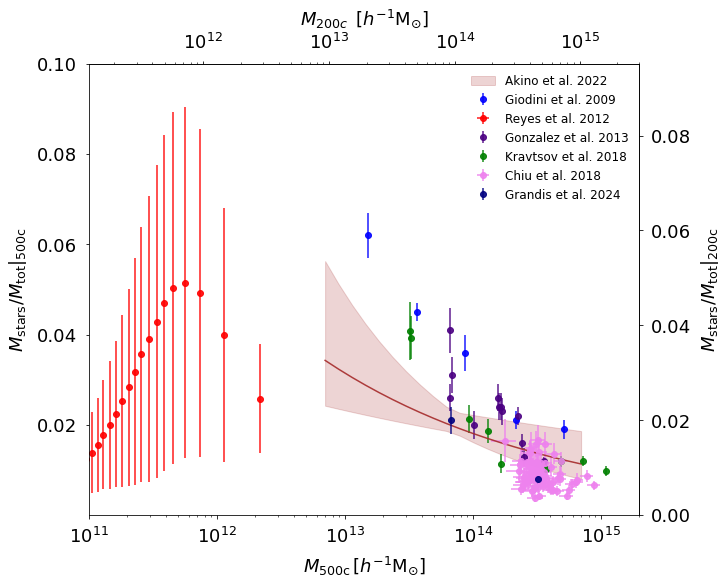

In [26]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,8), constrained_layout=True)
#ax.axhline(f_uni,  c='k', label=r'$\Omega_{\rm b}/\Omega_{\rm m}$ Planck18', alpha=0.7)
c_pop = 'orange'
size=18
pad = 8

ax.errorbar(m500_G,f_star_G,yerr=erf_star_G, marker="o",c="blue",ls="",label="Giodini et al. 2009",alpha=0.9)
ax.errorbar(M200_to_M500(M_200c_R),f200_to_f500(f_star_200_R),yerr=erf_star_200_R,xerr=erf_M200c_R,marker="o",c="red",ls="",label="Reyes et al. 2012",alpha=0.9)
ax.errorbar(m500,f_star,yerr=erf_star, marker="o",c="indigo",ls="",label="Gonzalez et al. 2013",alpha=0.9)
ax.errorbar(M_500_K,frac_star_K,yerr=err_frac_star_K,marker="o",c="green",ls="",label="Kravtsov et al. 2018",alpha=0.9)
ax.errorbar(M500_Chiu,f_star_Chiu,yerr=err_f_star_Chiu,xerr=err_M500_Chiu, marker="o",c="violet",ls="",label="Chiu et al. 2018",alpha=0.9)
ax.fill_between(M500_Akino_ih, f_star_Akino_m, f_star_Akino_p, color='brown', alpha=0.2, label="Akino et al. 2022")
ax.plot(M500_Akino_ih, f_star_Akino, color='brown', alpha=0.9)
ax.errorbar(M_500c_sGrandis, f_star_Grandis, yerr=err_f_star_Grandis, marker="o", c="navy", ls="",label="Grandis et al. 2024",alpha=0.9)

ax.semilogx([],[])
ax.set_xlim(1e11,2e15)
ax.set_ylim(1e-4,0.1)
ax.set_ylabel(r"$M_{\rm stars}/M_{\rm tot} |_{\rm 500c}$",size=size, rotation=90,labelpad=pad)
ax.set_xlabel(r"$M_{\rm 500c} \, [h^{-1}\rm M_{\odot}]$",size=size, rotation=0,labelpad=pad)

ax.legend( prop={"size":12}, fancybox=False, framealpha=0.)

ax.tick_params(axis='both', which='major', pad=pad, labelsize=size)


secax_top = ax.secondary_xaxis('top', functions=(M500_to_M200,M200_to_M500))
secax_top.set_xlabel(r"$M_{200c}\ \, [h^{-1}\rm M_{\odot}]$",size=size, labelpad=pad)
secax_top.tick_params(axis='both', which='major', pad=pad, labelsize=size)

secax_right = ax.secondary_yaxis('right', functions=(f500_to_f200, f200_to_f500))
secax_right.set_ylabel(r"$M_{\rm stars}/M_{\rm tot} |_{\rm 200c}$",size=size,labelpad=pad)
secax_right.tick_params(axis='both', which='major', pad=pad, labelsize=size)


plt.show()